In [86]:
import pandas as pd
import numpy as np
import seaborn as sns
import time
import matplotlib.pyplot as plt
import datetime

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

### The challenge is to build up classic ML models in weather forecasting. 

***!!! Final scoring of the model wasn't so high because our goal was to implement the models and compare the time and scoring. That's why I didn't complete deep research of the features !!!***

In [270]:
weather_dataset = pd.read_csv('task\weather.csv')
weather_dataset = weather_dataset.drop(columns=['Unnamed: 0'])

In [271]:
weather_dataset.shape

(142193, 23)

In [28]:
for column in weather_dataset.columns:
    print(f"{column} unique values: ")
    print(weather_dataset[column].nunique())
    print(f"NaN count: ")
    print(f"{len(weather_dataset[weather_dataset[column].isna() == True])}")
    print()

Date unique values: 
3436
NaN count: 
0

Location unique values: 
49
NaN count: 
0

MinTemp unique values: 
389
NaN count: 
637

MaxTemp unique values: 
505
NaN count: 
322

Rainfall unique values: 
679
NaN count: 
1406

Evaporation unique values: 
356
NaN count: 
60843

Sunshine unique values: 
145
NaN count: 
67816

WindGustDir unique values: 
16
NaN count: 
9330

WindGustSpeed unique values: 
67
NaN count: 
9270

WindDir9am unique values: 
16
NaN count: 
10013

WindDir3pm unique values: 
16
NaN count: 
3778

WindSpeed9am unique values: 
43
NaN count: 
1348

WindSpeed3pm unique values: 
44
NaN count: 
2630

Humidity9am unique values: 
101
NaN count: 
1774

Humidity3pm unique values: 
101
NaN count: 
3610

Pressure9am unique values: 
546
NaN count: 
14014

Pressure3pm unique values: 
549
NaN count: 
13981

Cloud9am unique values: 
10
NaN count: 
53657

Cloud3pm unique values: 
10
NaN count: 
57094

Temp9am unique values: 
440
NaN count: 
904

Temp3pm unique values: 
500
NaN count: 
27

### Date -> transform it to season time.

In [272]:
weather_dataset['Date'] = pd.to_datetime(weather_dataset['Date']).dt.month

In [273]:
def season(month):
    if 3 <= month <= 5:
        return 'spring'
    elif 6 <= month <= 8:
        return 'summer'
    elif 9 <= month <= 11:
        return 'autumn'
    else:
        return 'winter'
    
weather_dataset['Month'] = weather_dataset[['Date']].applymap(season)

### So, I'll use the season time like winter, summer etc. and month's number both.

### Location:

In [274]:
print(f"Number of locations: {len(weather_dataset['Location'].unique())}")
print(f"Number of NaN locations: {len(weather_dataset[weather_dataset['Location'].isna() == True])}")

Number of locations: 49
Number of NaN locations: 0


### Here, I'll use One-Hot-Encoding (Of course I could make deeper analysis, like Regions clustering or HashingTrick techniques, but our purpose is to check different models time and implementation. All the deeper analysis about regression & classification I did in Prices Prediction HW4).

In [275]:
encoded_regions = pd.get_dummies(weather_dataset, columns = ['Location'], prefix = 'Location')
weather_dataset = pd.concat([weather_dataset, encoded_regions], axis = 1)

In [276]:
weather_dataset = weather_dataset.drop(columns = ['Location'])

In [277]:
weather_dataset.iloc[:, 46:] = weather_dataset.iloc[:, 46:].astype(int)

### Then, temperatures:

In [278]:
weather_dataset = weather_dataset.loc[:, ~weather_dataset.columns.duplicated()]

In [279]:
print(f"NaN count MinTemp is: {len(weather_dataset[weather_dataset['MinTemp'].isna() == True])}")

NaN count MinTemp is: 637


### So, I'll replace it with the mean min Month value:

In [280]:
weather_dataset.head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Location_Townsville,Location_Tuggeranong,Location_Uluru,Location_WaggaWagga,Location_Walpole,Location_Watsonia,Location_Williamtown,Location_Witchcliffe,Location_Wollongong,Location_Woomera
0,12,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,0,0,0,0,0,0,0,0,0,0
1,12,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,0,0,0,0,0,0,0,0,0,0
2,12,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,0,0,0,0,0,0,0,0,0,0
3,12,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,0,0,0,0,0,0,0,0,0,0
4,12,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,0,0,0,0,0,0,0,0,0,0


In [281]:
mean_min_temps = weather_dataset.groupby('Date')['MinTemp'].transform('mean')

In [282]:
weather_dataset['MinTemp'].fillna(mean_min_temps, inplace=True)

In [283]:
print(f"NaN count MinTemp is: {len(weather_dataset[weather_dataset['MinTemp'].isna() == True])}")

NaN count MinTemp is: 0


### Same moves with NaN for MaxTemp:

In [284]:
print(f"NaN count MinTemp is: {len(weather_dataset[weather_dataset['MaxTemp'].isna() == True])}")

NaN count MinTemp is: 322


In [285]:
mean_max_temps = weather_dataset.groupby('Date')['MaxTemp'].transform('mean')
weather_dataset['MaxTemp'].fillna(mean_max_temps, inplace=True)
print(f"NaN count MinTemp is: {len(weather_dataset[weather_dataset['MaxTemp'].isna() == True])}")

NaN count MinTemp is: 0


### Have a look on dataset:

In [286]:
weather_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 72 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Date                       142193 non-null  int32  
 1   MinTemp                    142193 non-null  float64
 2   MaxTemp                    142193 non-null  float64
 3   Rainfall                   140787 non-null  float64
 4   Evaporation                81350 non-null   float64
 5   Sunshine                   74377 non-null   float64
 6   WindGustDir                132863 non-null  object 
 7   WindGustSpeed              132923 non-null  float64
 8   WindDir9am                 132180 non-null  object 
 9   WindDir3pm                 138415 non-null  object 
 10  WindSpeed9am               140845 non-null  float64
 11  WindSpeed3pm               139563 non-null  float64
 12  Humidity9am                140419 non-null  float64
 13  Humidity3pm                13

### So, all NaNs in numerical features will be replaced by Month mean values. Here we'll build the function:

In [287]:
def numerical_features_replace_nan(column):
    print(f"NaN count for {column} is: {len(weather_dataset[weather_dataset[column].isna() == True])}")
    mean_column = weather_dataset.groupby('Date')[column].transform('mean')
    weather_dataset[column].fillna(mean_column, inplace=True)
    print(f"NaN count for {column} is: {len(weather_dataset[weather_dataset[column].isna() == True])}")
    print()

In [288]:
numerical_columns = weather_dataset.select_dtypes(include=[np.number]).columns[3:17]

In [289]:
numerical_columns

Index(['Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm'],
      dtype='object')

In [290]:
for column in numerical_columns:
    numerical_features_replace_nan(column)

NaN count for Rainfall is: 1406
NaN count for Rainfall is: 0

NaN count for Evaporation is: 60843
NaN count for Evaporation is: 0

NaN count for Sunshine is: 67816
NaN count for Sunshine is: 0

NaN count for WindGustSpeed is: 9270
NaN count for WindGustSpeed is: 0

NaN count for WindSpeed9am is: 1348
NaN count for WindSpeed9am is: 0

NaN count for WindSpeed3pm is: 2630
NaN count for WindSpeed3pm is: 0

NaN count for Humidity9am is: 1774
NaN count for Humidity9am is: 0

NaN count for Humidity3pm is: 3610
NaN count for Humidity3pm is: 0

NaN count for Pressure9am is: 14014
NaN count for Pressure9am is: 0

NaN count for Pressure3pm is: 13981
NaN count for Pressure3pm is: 0

NaN count for Cloud9am is: 53657
NaN count for Cloud9am is: 0

NaN count for Cloud3pm is: 57094
NaN count for Cloud3pm is: 0

NaN count for Temp9am is: 904
NaN count for Temp9am is: 0

NaN count for Temp3pm is: 2726
NaN count for Temp3pm is: 0



### That's great! Replacement is valid!

In [291]:
weather_dataset.head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Location_Townsville,Location_Tuggeranong,Location_Uluru,Location_WaggaWagga,Location_Walpole,Location_Watsonia,Location_Williamtown,Location_Witchcliffe,Location_Wollongong,Location_Woomera
0,12,13.4,22.9,0.6,8.046298,8.975372,W,44.0,W,WNW,...,0,0,0,0,0,0,0,0,0,0
1,12,7.4,25.1,0.0,8.046298,8.975372,WNW,44.0,NNW,WSW,...,0,0,0,0,0,0,0,0,0,0
2,12,12.9,25.7,0.0,8.046298,8.975372,WSW,46.0,W,WSW,...,0,0,0,0,0,0,0,0,0,0
3,12,9.2,28.0,0.0,8.046298,8.975372,NE,24.0,SE,E,...,0,0,0,0,0,0,0,0,0,0
4,12,17.5,32.3,1.0,8.046298,8.975372,W,41.0,ENE,NW,...,0,0,0,0,0,0,0,0,0,0


In [292]:
weather_dataset['RainToday'].unique()

array(['No', 'Yes', nan], dtype=object)

### Then process non-numerical features:

In [293]:
cathegorical_columns = weather_dataset.select_dtypes(exclude=['number']).columns[:3]

In [294]:
cathegorical_columns

Index(['WindGustDir', 'WindDir9am', 'WindDir3pm'], dtype='object')

In [295]:
def cathegorical_features_replace_nan(columns):
    modes_by_month = {}
    for column in columns:
        modes_by_month[column] = weather_dataset.groupby('Date')[column].apply(lambda x: x.mode().iloc[0])
    
    for column in columns:
        weather_dataset[column] = weather_dataset.apply(lambda row: modes_by_month[column][row['Date']]
                                                        if pd.isna(row[column]) else row[column], axis = 1)

In [296]:
cathegorical_features_replace_nan(cathegorical_columns)

In [297]:
def print_nan_number(columns):
    for column in columns:
        print(f"NaN count for {column} is: {len(weather_dataset[weather_dataset[column].isna() == True])}")
        print()

In [298]:
print_nan_number(cathegorical_columns)

NaN count for WindGustDir is: 0

NaN count for WindDir9am is: 0

NaN count for WindDir3pm is: 0



### Ok, fine replacement. Also we should replace the NaNs in 'RainToday' column.

In [299]:
print(f"NaN count for RainToday is: {len(weather_dataset[weather_dataset['RainToday'].isna() == True])}")

NaN count for RainToday is: 1406


### Let's check for the correlation between the RainToday and RainTomorrow flags:

In [300]:
rain_today = weather_dataset['RainToday'][weather_dataset['RainToday'].isna() != True]
rain_tomorrow = weather_dataset['RainTomorrow'][weather_dataset['RainToday'].isna() != True]
len(rain_today), len(rain_tomorrow)

(140787, 140787)

In [301]:
rain_today = rain_today.replace({'No':0, 'Yes': 1})
rain_tomorrow = rain_tomorrow.replace({'No':0, 'Yes': 1})

In [302]:
print(f"Correlation between rainToday and rainTomorrow is: {np.corrcoef(rain_today, rain_tomorrow)[0, 1]}")

Correlation between rainToday and rainTomorrow is: 0.313096745508967


### There's some correlation.

### Probably correlation matrix could help us:

In [241]:
numerical_columns_for_corr_matrix = weather_dataset.select_dtypes(include=[np.number]).columns[1:17]

In [242]:
numerical_columns_for_corr_matrix

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm'],
      dtype='object')

In [303]:
weather_dataset_for_corr_matrix = weather_dataset[numerical_columns_for_corr_matrix][weather_dataset['RainToday'].isna() != True]
weather_dataset_for_corr_matrix['RainToday'] = rain_today
weather_dataset_for_corr_matrix.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,13.4,22.9,0.6,8.046298,8.975372,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.510468,16.9,21.8,0
1,7.4,25.1,0.0,8.046298,8.975372,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,4.647435,4.510468,17.2,24.3,0
2,12.9,25.7,0.0,8.046298,8.975372,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,4.647435,2.000000,21.0,23.2,0
3,9.2,28.0,0.0,8.046298,8.975372,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,4.647435,4.510468,18.1,26.5,0
4,17.5,32.3,1.0,8.046298,8.975372,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0


### Build HeatMap:

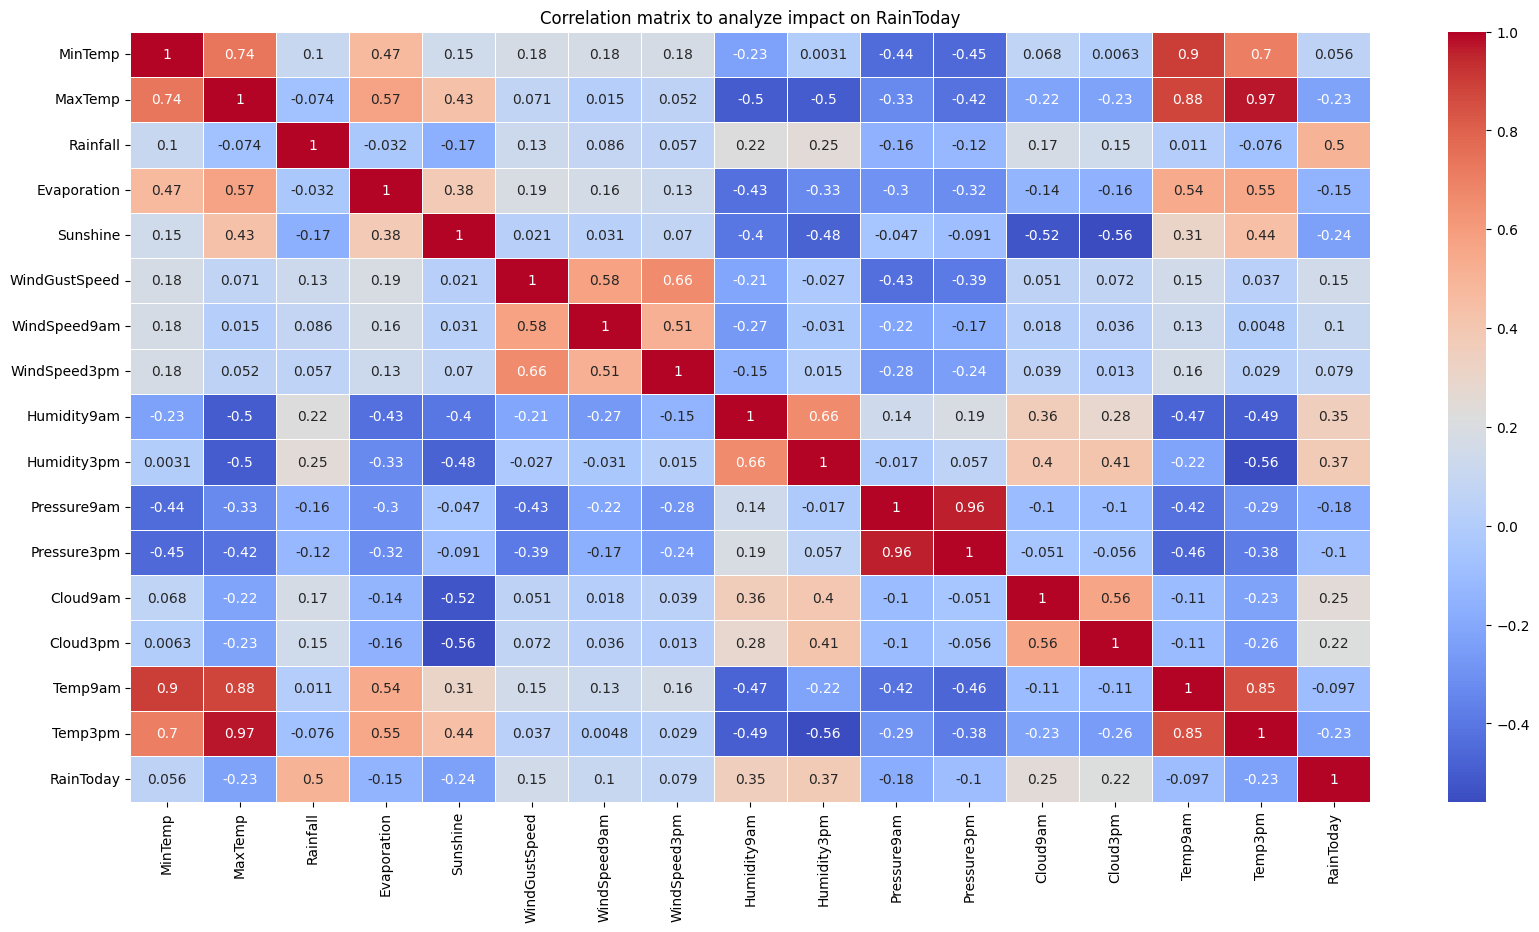

In [304]:
figure = plt.figure(figsize=(20, 10))
sns.heatmap(weather_dataset_for_corr_matrix.corr(), 
            annot=True,
            cmap = 'coolwarm', 
            linewidths=0.5)
plt.title('Correlation matrix to analyze impact on RainToday')
plt.show()

In [305]:
correlations = weather_dataset_for_corr_matrix.corr()['RainToday']
selected_features = correlations[np.abs(correlations) > 0.2].index.to_list()[:-1]
print(selected_features)

['MaxTemp', 'Rainfall', 'Sunshine', 'Humidity9am', 'Humidity3pm', 'Cloud9am', 'Cloud3pm', 'Temp3pm']


### And let's have a try to predict NaNs using this columns:

In [306]:
X_train, X_test, Y_train, Y_test = train_test_split(weather_dataset_for_corr_matrix[selected_features],
                                                    weather_dataset_for_corr_matrix['RainToday'], 
                                                    test_size = 0.25,
                                                    shuffle = False)

### Let's fit using LogisticRegression:

In [307]:
log_reg_rain_today = LogisticRegression()
log_reg_rain_today.fit(X_train, Y_train)

LogisticRegression()

In [308]:
print(classification_report(y_true = Y_test, y_pred = log_reg_rain_today.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     27633
           1       1.00      1.00      1.00      7564

    accuracy                           1.00     35197
   macro avg       1.00      1.00      1.00     35197
weighted avg       1.00      1.00      1.00     35197



### Ok, let's replace NaNs using this model:

In [309]:
predictions_rain_today_nan = log_reg_rain_today.predict(weather_dataset[selected_features][weather_dataset['RainToday'].isna() == True])
weather_dataset['RainToday'][weather_dataset['RainToday'].isna() == True] = predictions_rain_today_nan

In [311]:
weather_dataset['RainToday'] = weather_dataset['RainToday'].replace({'No':0, 'Yes': 1})

In [314]:
print(f"NaN count for RainToday is: {len(weather_dataset[weather_dataset['RainToday'].isna() == True])}")

NaN count for RainToday is: 0


### And the last thing to do is to complete One-Hot-Encoding for cathegorical features:

In [317]:
weather_dataset['RainTomorrow'] = weather_dataset['RainTomorrow'].replace({'No':0, 'Yes': 1})

In [319]:
encoded_regions = pd.get_dummies(weather_dataset, columns = cathegorical_columns)
weather_dataset = pd.concat([weather_dataset, encoded_regions], axis = 1)

In [321]:
weather_dataset = weather_dataset.drop(columns = cathegorical_columns)

In [332]:
weather_dataset.iloc[:, 138:] = weather_dataset.iloc[:, 138:].astype(int)

In [336]:
weather_dataset = weather_dataset.loc[:, ~weather_dataset.columns.duplicated()]

In [338]:
encoded_regions = pd.get_dummies(weather_dataset, columns = ['Month'])
weather_dataset = pd.concat([weather_dataset, encoded_regions], axis = 1)

In [341]:
weather_dataset = weather_dataset.drop(columns = ['Month'])

In [346]:
weather_dataset.iloc[:, 200:] = weather_dataset.iloc[:, 200:].astype(int)

### And final check for NaN values:

In [358]:
weather_dataset = weather_dataset.loc[:, ~weather_dataset.columns.duplicated()]

In [362]:
for column in weather_dataset.columns:
    if len(weather_dataset[weather_dataset[column].isna() == True]) != 0:
        print(f"NaN count for {column} is: {len(weather_dataset[weather_dataset[column].isna() == True])}")

### Empty output => correct! Let's save and go to the task:

In [363]:
weather_dataset.to_csv('weather_dataset_numercial.csv')

In [14]:
weather_dataset = pd.read_csv('task\weather_dataset_numercial.csv')

### Now, let's build the LogisticRegression Class and test it:

### Begin with sigmoid calc function:

In [4]:
theta = np.array([1, 2, 3])

X =  np.array([[ 1,  1, 1],
               [-1, -2, 1],
               [-1, -2, 2],
               [-2, -2, -3]
              ])

y = np.array([1, 1, 0, 0])

In [365]:
def sigmoid_calc(X_input, weights):
        sigmoid_result = 1 / (1 + np.exp(-np.dot(X_input, weights)))
        return sigmoid_result
    
sigmoid_calculated = sigmoid_calc(X, theta)

assert type(sigmoid_calculated) == np.ndarray, 'Invalid type'
assert sigmoid_calculated.shape == (X.shape[0],), 'Invalid data shape'
assert (sigmoid_calculated.round(3) == [0.998, 0.119, 0.731, 0.]).all(), 'Invalid func output'

print(sigmoid_calculated.round(3))

[0.998 0.119 0.731 0.   ]


### Everything's allright. Continue with label prediction function:

In [366]:
def binary_label_prediction_func(X_input, weights, threshold = 0.5):
    sigmoid_calculated = sigmoid_calc(X_input, weights)
    label_calc = (sigmoid_calculated > threshold).astype(int)
    return label_calc

predicted_labels = binary_label_prediction_func(X, theta)

assert type(predicted_labels) == np.ndarray, 'Invalid type'
assert predicted_labels.shape == (X.shape[0],), 'Invalid data shape'
assert min(predicted_labels) == 0, 'Invalid func output'
assert max(predicted_labels) == 1, 'Invalid func output'

print(predicted_labels)

[1 0 1 0]


### Allright again. Go on with LogLoss computing function:

In [367]:
def LogLossCalcFunc(X_input, y_output, weights):
    y_output[y_output == 0] = -1
    log_loss = np.sum(np.log(1 + np.exp(-y_output * np.dot(X_input, weights)))) / X_input.shape[0]
    return log_loss

assert LogLossCalcFunc(X, y, theta).round(3) == 0.861, 'Invalid LogLoss func calc'

print(LogLossCalcFunc(X, y, theta))

0.8606664224002999


### Precise result. Stochastic Gradient Descent ahead:

In [368]:
def GradientDescentCalc(X_input, y_output, weights):
    n_samples = X.shape[0]
    z = -y_output * np.dot(X_input, weights)
    exp_z = np.exp(z)
    gradients = (1 / n_samples) * np.dot(X_input.T, (1 / (1 + exp_z)) * exp_z * (-y_output))

    return gradients

assert GradientDescentCalc(X, y, theta).shape == theta.shape, 'Invalid data shape'

gradient = GradientDescentCalc(X, y, theta)
print(gradient)

[0.03681632 0.07425094 0.14471163]


### So, allright. We may build fit function:

In [369]:
def fit(X, y, batch_size=10, h=0.05,  iters=100, plot=True):

    size, dim = X.shape
    theta = np.random.uniform(size=dim)
    errors = []
    theta_history = theta
    colors = [plt.get_cmap('gist_rainbow')(i) for i in np.linspace(0,1,dim)]
    
    if plot:
        fig = plt.figure(figsize=(15, 10))
        ax1 = fig.add_subplot(221)
        ax2 = fig.add_subplot(222)
        ax3 = fig.add_subplot(212)
        fig.suptitle('Gradient descent')
        
    for _ in range(iters):  
        
        batch = np.random.choice(size, batch_size, replace=True)
        X_batch = X[batch]
        y_batch = y[batch]

        grad = GradientDescentCalc(X_batch, y_batch, theta)
        
        assert type(grad) == np.ndarray, 'Invalid type'
        assert len(grad.shape) == 1, '1 dim vector should be'
        assert grad.shape[0] == len(theta), 'length should be equal to the number of weights'
        
        theta -= grad * h
        
        theta_history = np.vstack((theta_history, theta))
        
        loss = LogLossCalcFunc(X, y, theta)
        errors.append(loss)
        
        if plot:
            ax1.clear()            
            ax1.scatter(range(dim), theta, label='Gradient solution')
            ax1.legend(loc="upper left")
            ax1.set_title('theta')
            ax1.set_ylabel(r'$\bar \beta$')
            ax1.set_xlabel('weight ID')
            
            
            ax2.plot(range(_+1), errors, 'g-')
            ax2.set_title('logloss')
            ax2.set_xlabel('itarations')
            
            ax3.plot(theta_history)
            ax3.set_title('update theta')
            ax3.set_ylabel('value')
            ax3.set_xlabel('iterations')
            time.sleep(0.05)
            fig.canvas.draw()   
            
    return theta

array([0.68957609, 0.23290588, 0.48228583])

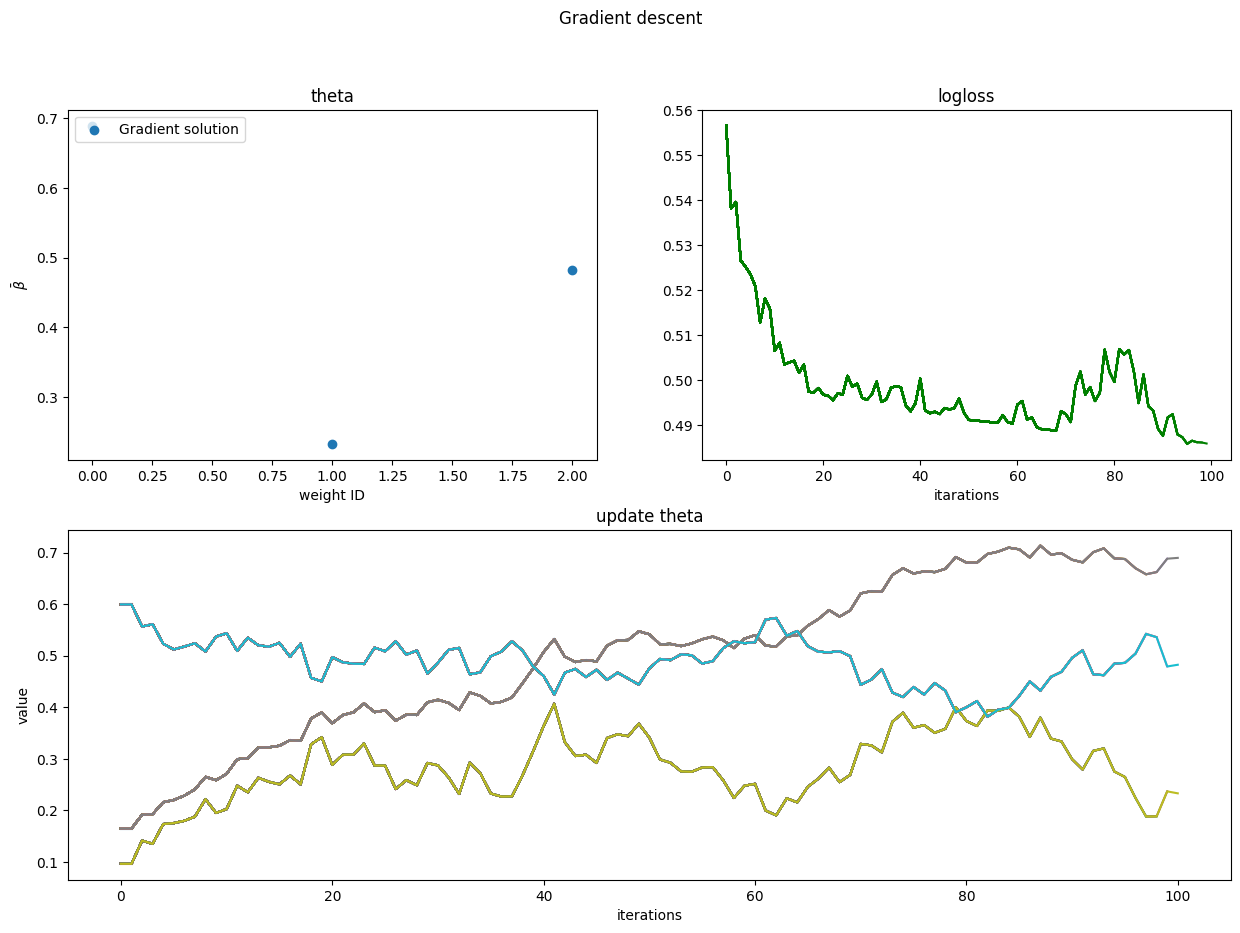

In [201]:
fit(X, y)

### Due to plots it looks like the valid output!

### Let's build up the ***class*** for our LogisticRegression:

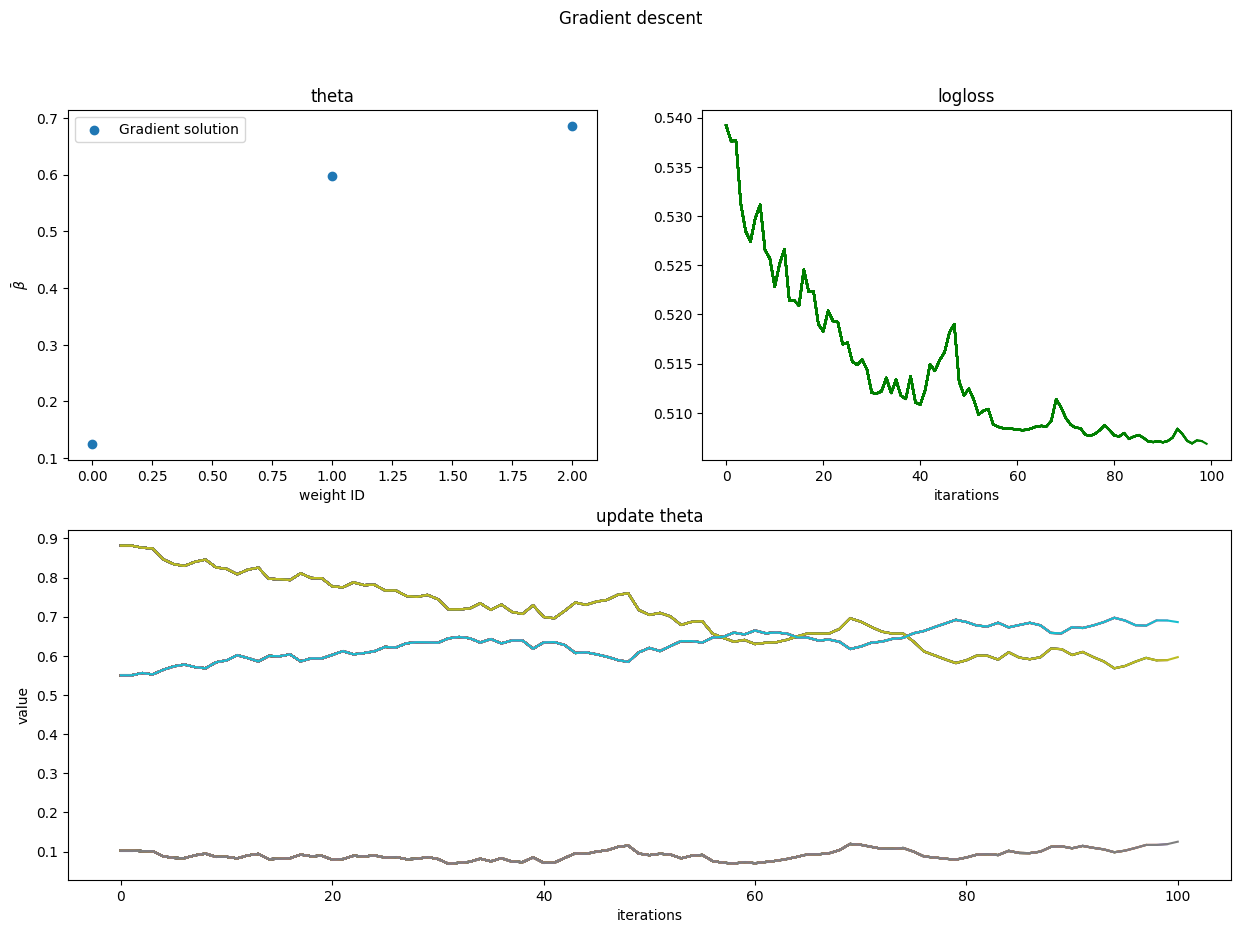

In [77]:
class CustomLogisticRegression:
    
    def sigmoid_calc(self, X_input):
        sigmoid_result = 1 / (1 + np.exp(-np.dot(X_input, self.weights)))
        
        assert type(sigmoid_result) == np.ndarray, 'Invalid type'
        assert sigmoid_result.shape == (X_input.shape[0],), 'Invalid data shape'
        
        return sigmoid_result
    
    def binary_label_prediction_func(self, X_input, threshold=0.5):
        sigmoid_calculated = self.sigmoid_calc(X_input)
        label_calc = (sigmoid_calculated > threshold).astype(int)
        
        assert type(label_calc) == np.ndarray, 'Invalid type'
        assert label_calc.shape == (X_input.shape[0],), 'Invalid data shape'
        return label_calc
    
    def LogLossCalcFunc(self, X_input, y_output):
        tmp = y_output.copy()
        tmp[tmp == 0] = -1
        log_loss = np.sum(np.log(1 + np.exp(-tmp * np.dot(X_input, self.weights)))) / X_input.shape[0]
        return log_loss
    
    def GradientDescentCalc(self, X_input, y_output):
        n_samples = X_input.shape[0]
        tmp = y_output.copy()
        tmp[tmp == 0] = -1
        z = -tmp * np.dot(X_input, self.weights)
        exp_z = np.exp(z)
        gradients = (1 / n_samples) * np.dot(X_input.T, (1 / (1 + exp_z)) * exp_z * (-tmp))
        return gradients
    
    def fit(self, X, y, batch_size=10, h=0.05,  iters=100, plot=True):

        size, dim = X.shape
        self.weights = np.random.uniform(size=dim)
        # print(self.weights)
        errors = []
        theta_history = self.weights
        colors = [plt.get_cmap('gist_rainbow')(i) for i in np.linspace(0,1,dim)]
        
        if plot:
            fig = plt.figure(figsize=(15, 10))
            ax1 = fig.add_subplot(221)
            ax2 = fig.add_subplot(222)
            ax3 = fig.add_subplot(212)
            fig.suptitle('Gradient descent')
            
        for _ in range(iters):  
            
            batch = np.random.choice(size, batch_size, replace=True)
            X_batch = X[batch]
            y_batch = y[batch]

            grad = self.GradientDescentCalc(X_input=X_batch, y_output=y_batch)
            
            assert type(grad) == np.ndarray, 'Invalid type'
            assert len(grad.shape) == 1, '1 dim vector should be'
            assert grad.shape[0] == len(self.weights), 'length should be equal to the number of weights'
           
            self.weights -= grad * h
            
            
            theta_history = np.vstack((theta_history, self.weights))
            
            loss = self.LogLossCalcFunc(X, y)
            errors.append(loss)
            
            if plot:
                ax1.clear()            
                ax1.scatter(range(dim), self.weights, label='Gradient solution')
                ax1.legend(loc="upper left")
                ax1.set_title('theta')
                ax1.set_ylabel(r'$\bar \beta$')
                ax1.set_xlabel('weight ID')
                
                
                ax2.plot(range(_+1), errors, 'g-')
                ax2.set_title('logloss')
                ax2.set_xlabel('itarations')
                
                ax3.plot(theta_history)
                ax3.set_title('update theta')
                ax3.set_ylabel('value')
                ax3.set_xlabel('iterations')
                time.sleep(0.05)
                fig.canvas.draw()   

log_reg = CustomLogisticRegression()
log_reg.fit(X=X, y=y, plot=True)

In [78]:
log_reg.weights

array([0.12537291, 0.5967499 , 0.68620389])

### So, looks like the same result. We'll compare that further.

### So, let's start the implementation and models research.

### ***sklearn.linear_model.LogisticRegression***

In [15]:
Y_weather = weather_dataset['RainTomorrow']
X_weather = weather_dataset.drop(columns = ['RainTomorrow', 'Unnamed: 0'])

In [16]:
print(X_weather.shape[0] == Y_weather.shape[0])

True


In [17]:
print(X_weather.shape[1])

119


In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X_weather,
                                                    Y_weather,
                                                    test_size = 0.25,
                                                    shuffle = False)

In [33]:
scaler_train = StandardScaler()
scaler_train.fit(X_train)
X_train_scaled = scaler_train.transform(X_train)

scaler_test = StandardScaler()
scaler_test.fit(X_test)
X_test_scaled = scaler_test.transform(X_test)

In [79]:
def timer(func):
    def wrapper(*args, **kwargs):
        start_time = time.perf_counter()
        result = func(*args, **kwargs)
        end_time = time.perf_counter()
        total_time = end_time - start_time
        print(f"{func.__name__} time is {total_time:.4f} seconds.")
        return result
    return wrapper

@timer
def SklearnLogisticRegressionLearn(log_reg, X, y):
    log_reg.fit(X, y)

@timer
def SklearnLogisticRegressionPredict(log_reg, X):
    prediction = log_reg.predict(X)
    return prediction

log_reg = LogisticRegression(penalty = None)
SklearnLogisticRegressionLearn(log_reg, X_train_scaled, Y_train)
prediction = SklearnLogisticRegressionPredict(log_reg, X_test_scaled)

SklearnLogisticRegressionLearn time is 2.1693 seconds.
SklearnLogisticRegressionPredict time is 0.0151 seconds.


### Prediction score is:

In [80]:
print(f"f1_score for sklearn LogisticRegression: {f1_score(y_true = Y_test, y_pred = log_reg.predict(X_test_scaled)):.4f}")

f1_score for sklearn LogisticRegression: 0.6010


In [81]:
print(classification_report(y_true = Y_test, y_pred = log_reg.predict(X_test_scaled)))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91     27882
           1       0.72      0.52      0.60      7667

    accuracy                           0.85     35549
   macro avg       0.80      0.73      0.76     35549
weighted avg       0.84      0.85      0.84     35549



In [108]:
array_log_reg_sklearn = [2.1693, 0.0151, 0.6010]

### Now it's time for the custom LogisticRegression:

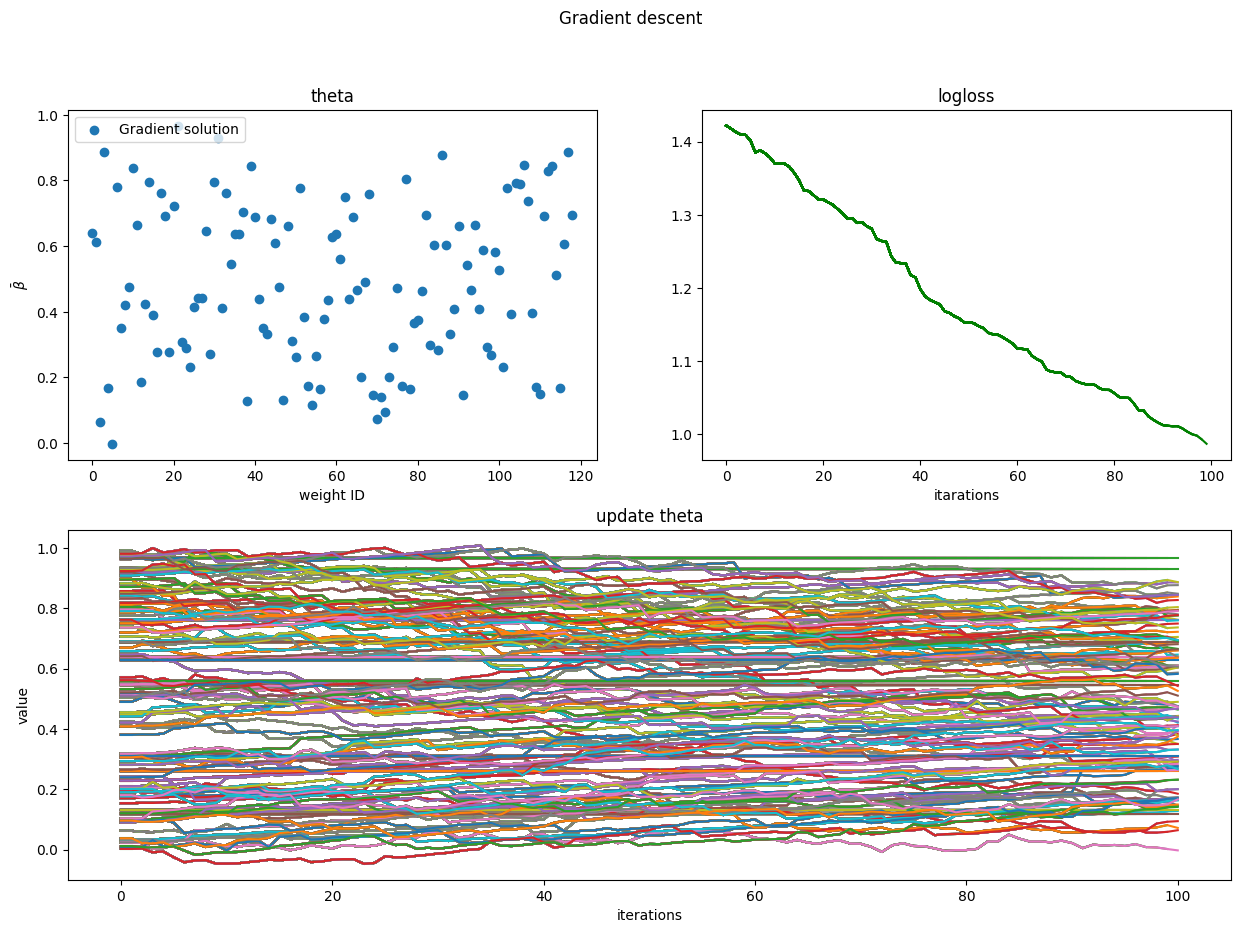

In [82]:
custom_log_reg = CustomLogisticRegression()
custom_log_reg.fit(X = X_train_scaled, y = np.asarray(Y_train), plot = True)

In [83]:
def timer(func):
    def wrapper(*args, **kwargs):
        start_time = time.perf_counter()
        result = func(*args, **kwargs)
        end_time = time.perf_counter()
        total_time = end_time - start_time
        print(f"{func.__name__} time is {total_time:.4f} seconds.")
        return result
    return wrapper

@timer
def CustomLogisticRegressionLearn(log_reg, X, y):
    log_reg.fit(X, y, plot = False, iters = 100)

@timer
def CustomLogisticRegressionPredict(log_reg, X):
    prediction = log_reg.binary_label_prediction_func(X)
    return prediction

custom_log_reg = CustomLogisticRegression()
CustomLogisticRegressionLearn(custom_log_reg, X_train_scaled, np.asarray(Y_train))
prediction = CustomLogisticRegressionPredict(custom_log_reg, X_test_scaled)

CustomLogisticRegressionLearn time is 1.3371 seconds.
CustomLogisticRegressionPredict time is 0.0036 seconds.


In [88]:
print(f"f1_score for custom LogisticRegression: {f1_score(y_true = Y_test, y_pred = custom_log_reg.binary_label_prediction_func(X_test_scaled)):.4f}")

f1_score for custom LogisticRegression: 0.4555


In [85]:
print(classification_report(y_true = Y_test, y_pred = custom_log_reg.binary_label_prediction_func(X_test_scaled)))

              precision    recall  f1-score   support

           0       0.89      0.60      0.71     27882
           1       0.33      0.73      0.46      7667

    accuracy                           0.63     35549
   macro avg       0.61      0.66      0.58     35549
weighted avg       0.77      0.63      0.66     35549



In [109]:
array_log_reg_custom = [1.3371, 0.0036, 0.4555]

### Actually, it works if we look at the LogLoss plot.

### Continue with ***sklearn.naive_bayes.GaussianNB***:

In [87]:
@timer
def NaiveBayesLearn(naive_bayes, X, y):
    naive_bayes.fit(X, y)

@timer
def NaiveBayesPredict(naive_bayes, X):
    prediction = naive_bayes.predict(X)
    return prediction

naive_bayes = GaussianNB()
NaiveBayesLearn(naive_bayes, X_train_scaled, Y_train)
prediction = NaiveBayesPredict(naive_bayes, X_test_scaled)

NaiveBayesLearn time is 0.3039 seconds.
NaiveBayesPredict time is 0.1350 seconds.


In [89]:
print(f"f1_score for sklearn Naive Bayes classifier: {f1_score(y_true = Y_test, y_pred = naive_bayes.predict(X_test_scaled)):.4f}")

f1_score for sklearn Naive Bayes classifier: 0.5952


In [90]:
print(classification_report(y_true = Y_test, y_pred = naive_bayes.predict(X_test_scaled)))

              precision    recall  f1-score   support

           0       0.93      0.77      0.84     27882
           1       0.48      0.77      0.60      7667

    accuracy                           0.77     35549
   macro avg       0.70      0.77      0.72     35549
weighted avg       0.83      0.77      0.79     35549



In [111]:
array_naive_bayes_sklearn = [0.3039, 0.1350, 0.5952]

### And ***sklearn.neighbors.KNeighborsClassifier*** in the end:

In [103]:
@timer
def KNeighborsLearn(knn, X, y):
    knn.fit(X, y)

@timer
def KNeighborsPredict(knn, X):
    prediction = knn.predict(X)
    return prediction

knn = KNeighborsClassifier(n_neighbors=1)
KNeighborsLearn(knn, X_train_scaled, Y_train)
prediction = KNeighborsPredict(knn, X_test_scaled)

KNeighborsLearn time is 0.1184 seconds.
KNeighborsPredict time is 23.5126 seconds.


In [104]:
print(f"f1_score for sklearn knn classifier: {f1_score(y_true = Y_test, y_pred = prediction):.4f}")

f1_score for sklearn knn classifier: 0.4120


In [105]:
print(classification_report(y_true = Y_test, y_pred = prediction))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85     27882
           1       0.44      0.39      0.41      7667

    accuracy                           0.76     35549
   macro avg       0.64      0.63      0.63     35549
weighted avg       0.75      0.76      0.75     35549



In [112]:
array_knn_sklearn = [0.1184, 23.5126, 0.4120]

### Sum up

In [115]:
index = ['SklearnLogisticRegressionLearn', 'CustomLogisticRegression', 'SklearnNaiveBayes', 'SklearnKNN']
columns = ['Learning time', 'Prediction time', 'f1_score']
sum_up = pd.DataFrame([array_log_reg_sklearn, array_log_reg_custom, array_naive_bayes_sklearn, array_knn_sklearn],
                      columns=columns,
                      index=index)

In [120]:
sum_up.T

,SklearnLogisticRegressionLearn,CustomLogisticRegression,SklearnNaiveBayes,SklearnKNN
Learning time,2.1693,1.3371,0.3039,0.1184
Prediction time,0.0151,0.0036,0.1350,23.5126
f1_score,0.6010,0.4555,0.5952,0.4120


Text(0, 0.5, 'Time in seconds')

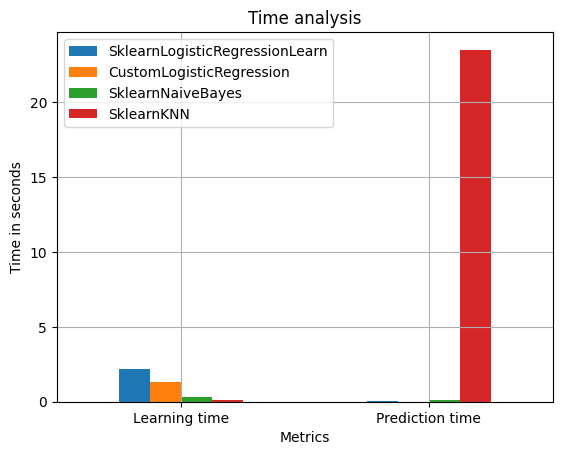

In [123]:
sum_up.T.iloc[:2, :].plot(kind = 'bar', rot = 0)
plt.grid()
plt.title('Time analysis')
plt.xlabel('Metrics')
plt.ylabel('Time in seconds')

(0.0, 3.0)

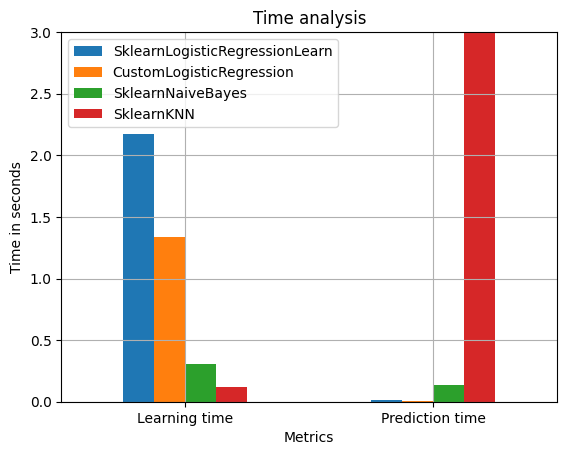

In [124]:
sum_up.T.iloc[:2, :].plot(kind = 'bar', rot = 0)
plt.grid()
plt.title('Time analysis')
plt.xlabel('Metrics')
plt.ylabel('Time in seconds')
plt.ylim([0, 3])

(0.0, 0.2)

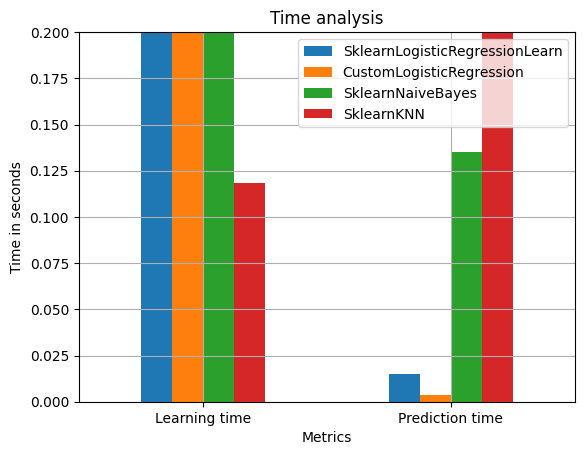

In [125]:
sum_up.T.iloc[:2, :].plot(kind = 'bar', rot = 0)
plt.grid()
plt.title('Time analysis')
plt.xlabel('Metrics')
plt.ylabel('Time in seconds')
plt.ylim([0, 0.2])

(0.0, 1.0)

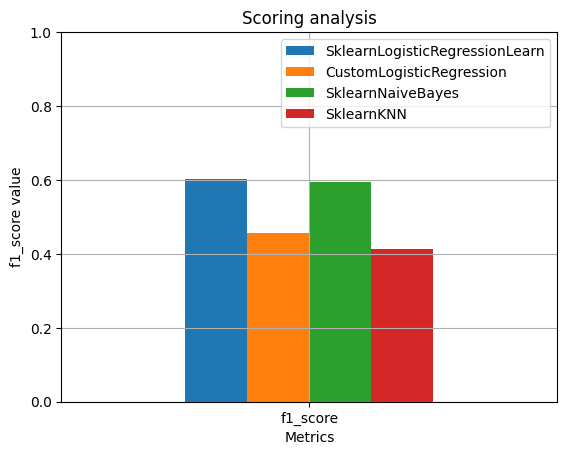

In [128]:
sum_up.T.iloc[2:, :].plot(kind = 'bar', rot = 0)
plt.grid()
plt.title('Scoring analysis')
plt.xlabel('Metrics')
plt.ylabel('f1_score value')
plt.ylim([0, 1])